In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

In [20]:
positive=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMPP_Extended/positive_numerical_moment_samples.csv")
negative=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMPP_Extended/negative_numerical_moment_samples.csv")

class_label=[]
for i in range (len(positive.index)):
    class_label.extend([1])





for i in range (len(negative.index)):
    class_label.extend([0])



sample=pd.concat([positive,negative], ignore_index=True, sort =False)
raw_cols=sample.columns

X=sample
y=class_label

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_data=scaler.transform(X)


from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=2/3,random_state=42)
x_data, y_class = sm.fit_resample(x_data, y)
from collections import Counter
print(Counter(y_class))



Counter({0: 1209, 1: 806})


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1209
           1       0.98      0.98      0.98       806

    accuracy                           0.98      2015
   macro avg       0.98      0.98      0.98      2015
weighted avg       0.98      0.98      0.98      2015

Accuracy Score: 0.9826302729528535
Confusion_matrix :
[[1189   20]
 [  15  791]]
Sensitivity :  0.9834574028122415
Specificity :  0.9813895781637717
Matthews correlation coefficient (MCC):  0.9638632969362969
y actual : 
0    1204
1     811
dtype: int64
y predicted : 
0    1204
1     811
dtype: int64
AUC: 0.982


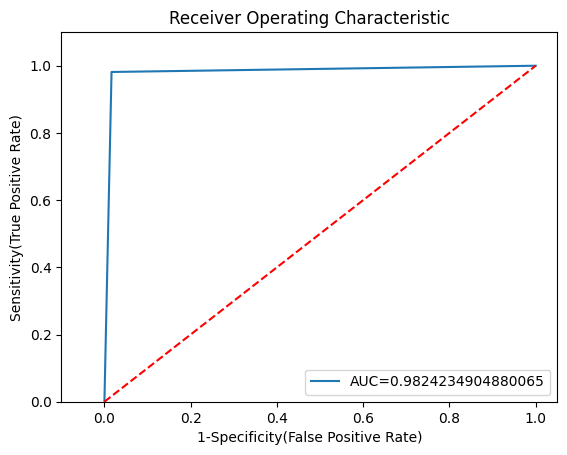

In [28]:
classifier =SVC(kernel='rbf', C=1,gamma=0.02,probability=True, class_weight={0:2,1:3})


# KFol01025./d cross validation
cv = KFold(n_splits=15)

y_pred = cross_val_predict(classifier, x_data, y_class, cv = cv)

print(classification_report(y_class, y_pred))

print("Accuracy Score: "+str(accuracy_score(y_class,y_pred)))
print("Confusion_matrix :")


cm=confusion_matrix(y_class,y_pred)
print(cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
#accuracy1=(cm[0,0]+cm[1,1])/total1
#print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

print("Matthews correlation coefficient (MCC): ",matthews_corrcoef(y_class, y_pred))



#Distribution of y test
print('y actual : \n' +  str(pd.Series(y_pred).value_counts()))
#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))





from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_class, y_pred)

# calculate AUC
auc = roc_auc_score(y_class, y_pred)
print('AUC: %.3f' % auc)



import numpy as np

np.savetxt("/content/drive/MyDrive/Colab Notebooks/SMPP_Extended/tpr_SMPP_cross_validation.txt",tpr,delimiter=',');
np.savetxt("/content/drive/MyDrive/Colab Notebooks/SMPP_Extended/fpr_SMPP_cross_validation.txt",fpr,delimiter=',');



#plot_roc_curve(fpr, tpr)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.05])
plt.ylim([0.0, 1.10])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Train Sample:
Counter({0: 912, 1: 599})
Test Sample:
Counter({0: 297, 1: 207})
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       297
           1       0.99      1.00      0.99       207

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504

Accuracy Score: 0.9940476190476191
Confusion_matrix :
[[295   2]
 [  1 206]]
Sensitivity :  0.9932659932659933
Specificity :  0.9951690821256038
Matthews correlation coefficient (MCC):  0.9877203978288777
y actual : 
0    296
1    208
dtype: int64
y predicted : 
0    296
1    208
dtype: int64
AUC: 0.994


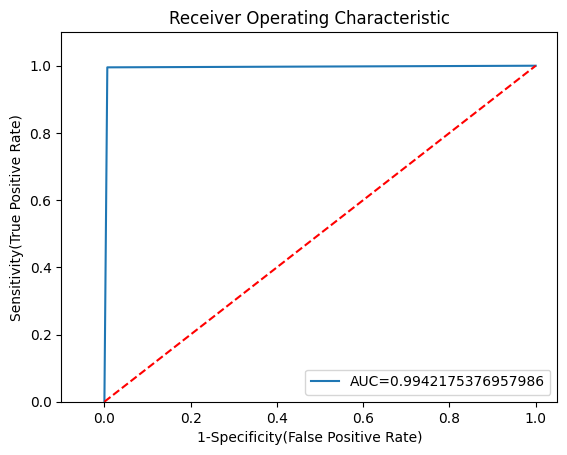

In [32]:
classifier =SVC(kernel='rbf', C=1,gamma=0.025,probability=True, class_weight={0:1,1:3})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, test_size=0.25, random_state=9)

print("Train Sample:")
print(Counter(y_train))

print("Test Sample:")
print(Counter(y_test))


classifier.fit(X_train, y_train)


pred=classifier.predict(X_test)


print(classification_report(y_test, pred))


print("Accuracy Score: "+str(accuracy_score(y_test,pred)))
print("Confusion_matrix :")


cm=confusion_matrix(y_test,pred)
print(cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
#accuracy1=(cm[0,0]+cm[1,1])/total1
#print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

print("Matthews correlation coefficient (MCC): ",matthews_corrcoef(y_test, pred))



#Distribution of y test
print('y actual : \n' +  str(pd.Series(pred).value_counts()))
#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(pred).value_counts()))





from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# calculate AUC
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

"""
np.savetxt("Roc_data_independent/tpr_SMPP_independent.txt",tpr,delimiter=',');
np.savetxt("Roc_data_independent/fpr_SMPP_independent",fpr,delimiter=',');
"""
#plot_roc_curve(fpr, tpr)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.05])
plt.ylim([0.0, 1.10])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
np.savetxt("/content/drive/MyDrive/Colab Notebooks/SMPP_Extended/tpr_SMPP_independent.txt",tpr,delimiter=',');
np.savetxt("/content/drive/MyDrive/Colab Notebooks/SMPP_Extended/fpr_SMPP_independent.txt",fpr,delimiter=',');